<a href="https://colab.research.google.com/github/cwp-kr/ML-class/blob/main/11%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [14]:
mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [15]:
train_x.shape

(60000, 28, 28)

In [16]:
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

In [17]:
train_x.shape

(60000, 28, 28, 1)

In [1]:
# input layer
input_h = 28   # input height
input_w = 28   # input width
input_ch = 1   # input channel : Gray scale


# 1st convolution layer
k1_h = 3
k1_w = 3
k1_ch = 32
p1_h = 2
p1_w = 2
# (None, 14, 14, 32)

# 2nd convolution layer
k2_h = 3
k2_w = 3
k2_ch = 64
p2_h = 2
p2_w = 2
# (None, 7, 7, 64)

# Fully connected : flatten the features (7x7x64)
conv_result_size = 7*7*64
n_hidden = 100
n_output = 10 #(0~9)

In [ ]:
# Kernel size : [kernel_height, kernel_width, input_ch, output_ch]
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

weights = {
    'conv1' : tf.Variable(tf.random.normal([k1_h, k1_w, input_ch, k1_ch], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random.normal([k2_h, k2_w, k1_ch, k2_ch], stddev = 0.1)),
    'hidden' : tf.Variable(tf.random.normal([conv_result_size, n_hidden], stddev = 0.1)),
    'output' : tf.Variable(tf.random.normal([n_hidden, n_output], stddev = 0.1))
}

# bias size : [output_ch] or [neuron_size]
biases = {
    'conv1' : tf.Variable(tf.random.normal([k1_ch], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random.normal([k2_ch], stddev = 0.1)),
    'hidden' : tf.Variable(tf.random.normal([n_hidden], stddev = 0.1)),
    'output' : tf.Variable(tf.random.normal([n_output], stddev = 0.1))
}

# input layer : [batch_size, image_height, image_width, channels]
# output layer : [batch_size, class_size]
x = tf.placeholder(shape=[None, input_h, input_w, input_ch], dtype=tf.float32)
y = tf.placeholder(shape=[None, n_output], dtype=tf.float32)

In [ ]:
def net(x, weights, biases):
    # 1st convolution layer
    conv1 = tf.nn.conv2d(x, weights['conv1'], strides=[1,1,1,1], padding='SAME')
    conv1 = tf.nn.relu(tf.add(conv1, biases['conv1']))
    maxp1 = tf.nn.max_pool(conv1, ksize=[1, p1_h, p1_w, 1], strides=[1, p1_h, p1_w, 1], padding='SAME')

    # 2nd convolution layer
    conv2 = tf.nn.conv2d(maxp1, weights['conv2'], strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(tf.add(conv2, biases['conv2']))
    maxp2 = tf.nn.max_pool(conv2, ksize=[1, p2_h, p2_w, 1], strides=[1, p2_h, p2_w, 1], padding='SAME')

    maxp2_flatten = tf.reshape(maxp2, [-1, conv_result_size])

    # Fully connected
    hidden = tf.add(tf.matmul(maxp2_flatten, weights['hidden']), biases['hidden'])
    hidden = tf.nn.relu(hidden)
    output = tf.add(tf.matmul(hidden, weights['output']), biases['output'])

    return output

In [ ]:
# Loss function

LR = 0.0001
pred = net(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels=y)
loss = tf.reduce_mean(loss)

optm = tf.train.AdamOptimizer(learning_rate=LR).minimize(loss)

Iter : 0
Train Loss : 2.517491340637207
Cost : 2.4938554763793945
Iter : 250
Train Loss : 0.4163109064102173
Cost : 0.5352586507797241
Iter : 500
Train Loss : 0.4768962860107422
Cost : 0.37018704414367676
Iter : 750
Train Loss : 0.07855644077062607
Cost : 0.16466528177261353
Iter : 1000
Train Loss : 0.17252406477928162
Cost : 0.11085478961467743
Iter : 1250
Train Loss : 0.11034809798002243
Cost : 0.05022888258099556
Iter : 1500
Train Loss : 0.33835604786872864
Cost : 0.18286120891571045
Iter : 1750
Train Loss : 0.12794972956180573
Cost : 0.12318416684865952
Iter : 2000
Train Loss : 0.07626685500144958
Cost : 0.15115509927272797
Iter : 2250
Train Loss : 0.20166487991809845
Cost : 0.11559993773698807


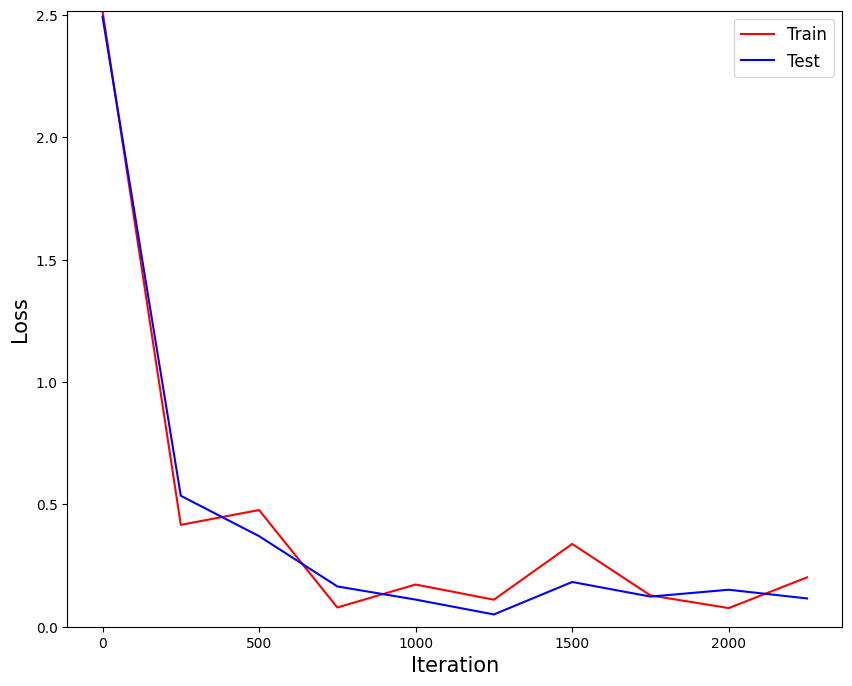

In [ ]:
# Optimization

n_batch = 50
n_iter = 2500
n_prt = 250

sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_record_train = []
loss_record_test = []
for epoch in range(n_iter):
    batch_indices = np.random.choice(train_x.shape[0], size=n_batch, replace=False)
    batch_x = train_x[batch_indices]
    batch_y = train_y[batch_indices]
    batch_y = tf.keras.utils.to_categorical(batch_y, num_classes=10)

    sess.run(optm, feed_dict={x: batch_x, y: batch_y})

    if epoch % n_prt == 0:
        test_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
        test_batch_x = test_x[test_indices]
        test_batch_y = test_y[test_indices]
        test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)


        c1 = sess.run(loss, feed_dict={x: batch_x, y: batch_y})
        c2 = sess.run(loss, feed_dict={x: test_batch_x, y: test_batch_y})

        loss_record_train.append(c1)
        loss_record_test.append(c2)
        print("Iter : {}".format(epoch))
        print("Train Loss : {}".format(c1))
        print("Cost : {}".format(c2))

plt.figure(figsize = (10,8))
plt.plot(np.arange(len(loss_record_train))*n_prt, loss_record_train, 'r', label = 'Train')
plt.plot(np.arange(len(loss_record_test))*n_prt, loss_record_test, 'b', label = 'Test')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend(fontsize = 12)
plt.ylim([0, np.max(loss_record_train)])
plt.show()

In [ ]:
# Evaluation
# Get a random batch of test data
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))  # Reshape the batch if needed
# Convert labels to one-hot encoding if necessary
test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)  # Adjust num_classes if needed

my_pred = sess.run(pred, feed_dict={x: test_batch_x.reshape(-1, 28, 28, 1)})
my_pred = np.argmax(my_pred, axis=1)

labels = np.argmax(test_batch_y, axis=1)

accr = np.mean(np.equal(my_pred, labels))
print("Accuracy : {}".format(accr*100))

Accuracy : 96.0


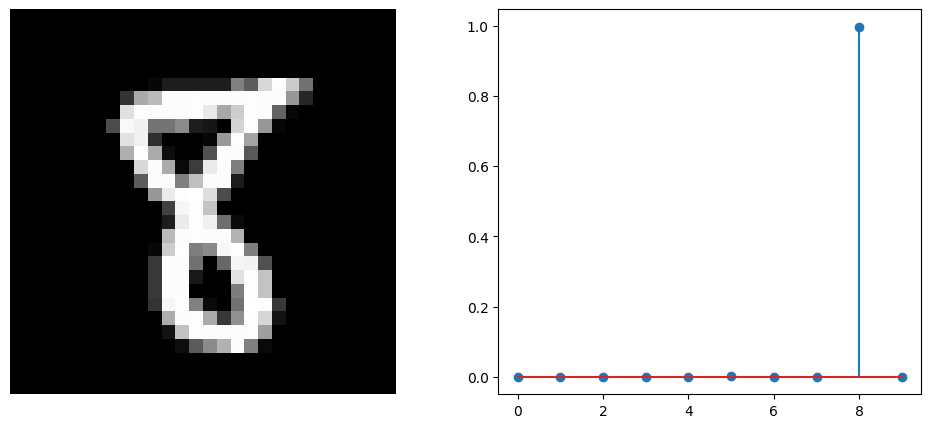

Prediction : 8
Probability : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
# Get a random batch of test data
n_batch = 1
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))  # Reshape the batch if needed
# Convert labels to one-hot encoding if necessary
test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)  # Adjust num_classes if needed

logits = sess.run(tf.nn.softmax(pred), feed_dict={x: test_batch_x.reshape(-1, 28, 28, 1)})
predict = np.argmax(logits)

plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.imshow(test_batch_x.reshape(28, 28), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(logits.ravel())
plt.show()

np.set_printoptions(precision = 2, suppress = True)
print('Prediction : {}'.format(predict))
print('Probability : {}'.format(logits.ravel()))

In [26]:
# input layer
input_h = 28   # input height
input_w = 28   # input width
input_ch = 1   # input channel : Gray scale


# 1st convolution layer
k1_h = 3
k1_w = 3
k1_ch = 32
p1_h = 2
p1_w = 2
# (None, 14, 14, 32)

# 2nd convolution layer
k2_h = 3
k2_w = 3
k2_ch = 64
p2_h = 2
p2_w = 2
# (None, 7, 7, 64)

# 3rd convolution layer
k3_h = 3
k3_w = 3
k3_ch = 128
p3_h = 2
p3_w = 2
# (None, 4, 4, 128)

# Fully connected : flatten the features (7x7x64)
conv_result_size = 4*4*128
n_hidden1 = 100
n_hidden2 = 625
n_output = 10 #(0~9)

In [27]:
# Kernel size : [kernel_height, kernel_width, input_ch, output_ch]
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

weights = {
    'conv1' : tf.Variable(tf.random.normal([k1_h, k1_w, input_ch, k1_ch], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random.normal([k2_h, k2_w, k1_ch, k2_ch], stddev = 0.1)),
    'conv3': tf.Variable(tf.random.normal([k3_h, k3_w, k2_ch, k3_ch], stddev=0.1)),
    'hidden1' : tf.Variable(tf.random.normal([conv_result_size, n_hidden1], stddev = 0.1)),
    'hidden2': tf.Variable(tf.random.normal([n_hidden1, n_hidden2], stddev=0.1)),
    'output' : tf.Variable(tf.random.normal([n_hidden2, n_output], stddev = 0.1))
}

# bias size : [output_ch] or [neuron_size]
biases = {
    'conv1' : tf.Variable(tf.random.normal([k1_ch], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random.normal([k2_ch], stddev = 0.1)),
    'conv3' : tf.Variable(tf.random.normal([k3_ch], stddev = 0.1)),
    'hidden1': tf.Variable(tf.random.normal([n_hidden1], stddev=0.1)),
    'hidden2': tf.Variable(tf.random.normal([n_hidden2], stddev=0.1)),
    'output' : tf.Variable(tf.random.normal([n_output], stddev = 0.1))
}

# input layer : [batch_size, image_height, image_width, channels]
# output layer : [batch_size, class_size]
x = tf.placeholder(shape=[None, input_h, input_w, input_ch], dtype=tf.float32)
y = tf.placeholder(shape=[None, n_output], dtype=tf.float32)

In [31]:
def net(x, weights, biases):
    # 1st convolution layer
    conv1 = tf.nn.conv2d(x, weights['conv1'], strides=[1,1,1,1], padding='SAME')
    conv1 = tf.nn.relu(tf.add(conv1, biases['conv1']))
    maxp1 = tf.nn.max_pool(conv1, ksize=[1, p1_h, p1_w, 1], strides=[1, p1_h, p1_w, 1], padding='SAME')

    # 2nd convolution layer
    conv2 = tf.nn.conv2d(maxp1, weights['conv2'], strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(tf.add(conv2, biases['conv2']))
    maxp2 = tf.nn.max_pool(conv2, ksize=[1, p2_h, p2_w, 1], strides=[1, p2_h, p2_w, 1], padding='SAME')

    # 2nd convolution layer
    conv3 = tf.nn.conv2d(maxp2, weights['conv3'], strides=[1, 1, 1, 1], padding='SAME')
    conv3 = tf.nn.relu(tf.add(conv3, biases['conv3']))
    maxp3 = tf.nn.max_pool(conv3, ksize=[1, p3_h, p3_w, 1], strides=[1, p3_h, p3_w, 1], padding='SAME')

    maxp2_flatten = tf.reshape(maxp3, [-1, conv_result_size])

    # Fully connected
    hidden1 = tf.add(tf.matmul(maxp2_flatten, weights['hidden1']), biases['hidden1'])
    hidden1 = tf.nn.relu(hidden1)

    hidden2 = tf.add(tf.matmul(hidden1, weights['hidden2']), biases['hidden2'])
    hidden2 = tf.nn.relu(hidden2)

    output = tf.add(tf.matmul(hidden2, weights['output']), biases['output'])

    return output

In [32]:
# Loss function

LR = 0.0001
pred = net(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels=y)
loss = tf.reduce_mean(loss)

optm = tf.train.AdamOptimizer(learning_rate=LR).minimize(loss)

Iter : 0
Train Loss : 3.012982130050659
Cost : 2.7371912002563477
Iter : 250
Train Loss : 0.25304606556892395
Cost : 0.374021977186203
Iter : 500
Train Loss : 0.2765938341617584
Cost : 0.285869300365448
Iter : 750
Train Loss : 0.28918322920799255
Cost : 0.13355126976966858
Iter : 1000
Train Loss : 0.08877773582935333
Cost : 0.29918453097343445
Iter : 1250
Train Loss : 0.059779081493616104
Cost : 0.07115746289491653
Iter : 1500
Train Loss : 0.08091350644826889
Cost : 0.07332737743854523
Iter : 1750
Train Loss : 0.06520387530326843
Cost : 0.18818964064121246
Iter : 2000
Train Loss : 0.0068311309441924095
Cost : 0.07313442975282669
Iter : 2250
Train Loss : 0.09212197363376617
Cost : 0.11367766559123993


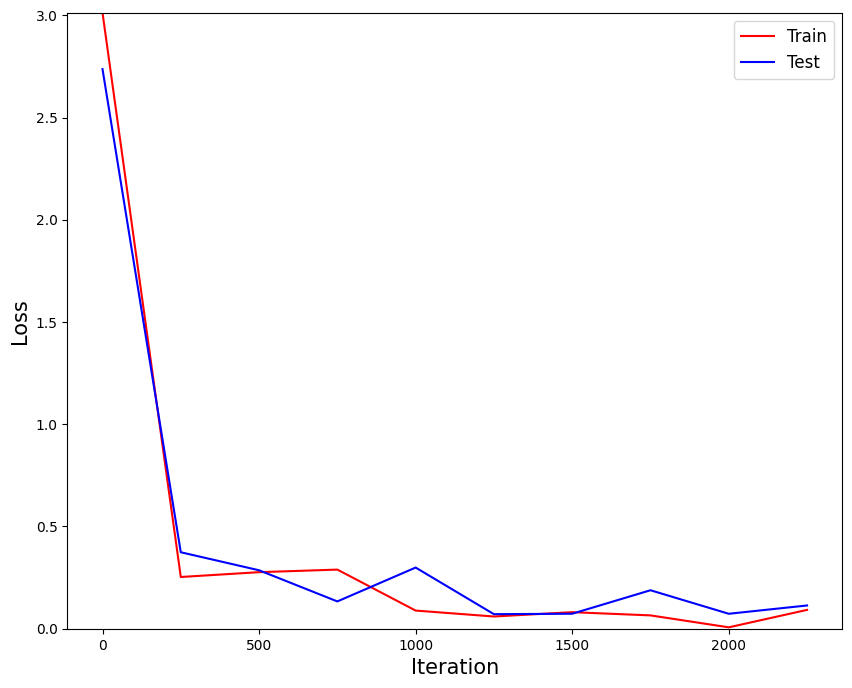

In [33]:
# Optimization

n_batch = 50
n_iter = 2500
n_prt = 250

sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_record_train = []
loss_record_test = []
for epoch in range(n_iter):
    batch_indices = np.random.choice(train_x.shape[0], size=n_batch, replace=False)
    batch_x = train_x[batch_indices]
    batch_y = train_y[batch_indices]
    batch_y = tf.keras.utils.to_categorical(batch_y, num_classes=10)

    sess.run(optm, feed_dict={x: batch_x, y: batch_y})

    if epoch % n_prt == 0:
        test_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
        test_batch_x = test_x[test_indices]
        test_batch_y = test_y[test_indices]
        test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)


        c1 = sess.run(loss, feed_dict={x: batch_x, y: batch_y})
        c2 = sess.run(loss, feed_dict={x: test_batch_x, y: test_batch_y})

        loss_record_train.append(c1)
        loss_record_test.append(c2)
        print("Iter : {}".format(epoch))
        print("Train Loss : {}".format(c1))
        print("Cost : {}".format(c2))

plt.figure(figsize = (10,8))
plt.plot(np.arange(len(loss_record_train))*n_prt, loss_record_train, 'r', label = 'Train')
plt.plot(np.arange(len(loss_record_test))*n_prt, loss_record_test, 'b', label = 'Test')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend(fontsize = 12)
plt.ylim([0, np.max(loss_record_train)])
plt.show()

In [34]:
# Evaluation
# Get a random batch of test data
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))  # Reshape the batch if needed
# Convert labels to one-hot encoding if necessary
test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)  # Adjust num_classes if needed

my_pred = sess.run(pred, feed_dict={x: test_batch_x.reshape(-1, 28, 28, 1)})
my_pred = np.argmax(my_pred, axis=1)

labels = np.argmax(test_batch_y, axis=1)

accr = np.mean(np.equal(my_pred, labels))
print("Accuracy : {}".format(accr*100))

Accuracy : 100.0


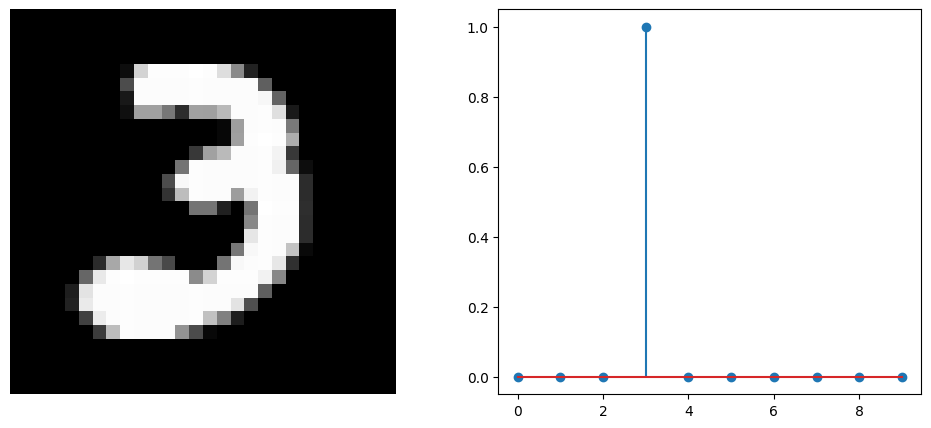

Prediction : 3
Probability : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [35]:
# Get a random batch of test data
n_batch = 1
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))  # Reshape the batch if needed
# Convert labels to one-hot encoding if necessary
test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)  # Adjust num_classes if needed

logits = sess.run(tf.nn.softmax(pred), feed_dict={x: test_batch_x.reshape(-1, 28, 28, 1)})
predict = np.argmax(logits)

plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.imshow(test_batch_x.reshape(28, 28), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(logits.ravel())
plt.show()

np.set_printoptions(precision = 2, suppress = True)
print('Prediction : {}'.format(predict))
print('Probability : {}'.format(logits.ravel()))

정확도 96퍼에서 100퍼로 증가했다